# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of graded assignment*
- Provide your GitHub URL to the notebook as the submission for the Brightspace assignment page
- Post errors in the course Github's issue page for faster feedback
- ***DO NOT* forget to remove your review partner from your repository before you put the code in Github to avoid plagiarism**

### DEADLINE FOR THIS ASSIGNMENT IS 29 OCTOBER 2021 BEFORE 23:59

<hr />

# Assignment


In the past 7 weeks, you have been working with Google mobility data. Now, let's combine that data with covid-19 data to see if we can derive some *interesting* insights. There are multiple sources of COVID-19 data. Maybe the country that you chose has its separate data source. 
- One such data source is from [OurWorldInData](https://github.com/owid/covid-19-data/tree/master/public/data), which contains daily covid data from 217 countries and the corresponding government response measured as **stringency index**.
- Another data source that provides municipal, provincial, and nationwide covid data for the whole of **Netherlands** is [here](https://github.com/J535D165/CoronaWatchNL).

Feel free to use either of these data sources or something you found on your own!

## Part I - Data import

1. *[5 points]* Create a new dataframe

This dataframe should combine mobility data and covid-19 data of your chosen country. There are different types of covid data available such as the number of positively tested cases, hospital admission, fatality rates, government stringency index, etc. Provide a brief explanation or data dictionary of your new dataframe. Keep in mind that you need to associate these two datasets, then pick municipal, provincial, or nationwide data accordingly.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr 


In [3]:
# Read OurWorldInData Data
file_path = './data/owid-covid-data.csv'
owd = pd.read_csv(file_path, index_col = 3, parse_dates = True)
owd['iso_code'] = owd['iso_code'].str[:2]

# Read google mobility data
google = pd.read_csv('./data/2020_GR_Region_Mobility_Report.csv', index_col = 8, parse_dates = True, low_memory=False)

#Initial date 26-02-2020 and data for Greece
google_gr = google[google['country_region']=='Greece'].loc['26-02-2020':]

# Sub_region_1 contains data that corresponds the individual municipality of Greece and the whole Greece 
#Data for the whole Greecee is assigned with Nan and replaces as name Greece
google_gr['sub_region_1'].fillna('Greece', inplace = True)

#Remove column that is not usful for analysis
google_gr = google_gr.drop('place_id', 1)
owd_gr = owd[owd['location']=='Greece'].loc['26-02-2020':'18-10-2021']

C:\Users\Pinelopi\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


In [4]:
#Identify unique municipalities of Greece
greek_regions = np.unique(google_gr['sub_region_1'])
merged = pd.DataFrame()


#Merge data of owd with google data for every municipality
for i in greek_regions:
    merged = merged.append(pd.concat([google_gr[google_gr['sub_region_1'] == i], owd_gr], 1))

#Drop columns with only Nan elements   
merged = merged.dropna(1, how="all")
merged

C:\Users\Pinelopi\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  
C:\Users\Pinelopi\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


,country_region_code,country_region,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,iso_code,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-02-26,GR,Greece,Decentralized Administration of Attica,1.0,14.0,22.0,4.0,3.0,-1.0,GR,...,4.55,35.3,52.0,4.21,82.24,0.888,NaN,NaN,NaN,NaN
2020-02-27,GR,Greece,Decentralized Administration of Attica,2.0,23.0,12.0,5.0,3.0,-1.0,GR,...,4.55,35.3,52.0,4.21,82.24,0.888,NaN,NaN,NaN,NaN
2020-02-28,GR,Greece,Decentralized Administration of Attica,-3.0,17.0,5.0,3.0,1.0,-1.0,GR,...,4.55,35.3,52.0,4.21,82.24,0.888,NaN,NaN,NaN,NaN
2020-02-29,GR,Greece,Decentralized Administration of Attica,-13.0,12.0,-10.0,-9.0,-1.0,0.0,GR,...,4.55,35.3,52.0,4.21,82.24,0.888,NaN,NaN,NaN,NaN
2020-03-01,GR,Greece,Decentralized Administration of Attica,-3.0,22.0,44.0,-10.0,0.0,-1.0,GR,...,4.55,35.3,52.0,4.21,82.24,0.888,-87.0,-0.35,-1.95,-8.388981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GR,...,4.55,35.3,52.0,4.21,82.24,0.888,NaN,NaN,NaN,NaN
2021-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GR,...,4.55,35.3,52.0,4.21,82.24,0.888,NaN,NaN,NaN,NaN
2021-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GR,...,4.55,35.3,52.0,4.21,82.24,0.888,NaN,NaN,NaN,NaN


## Part II - Data processing

As you already know, there are various peaks/valleys in the changes of mobility activity data. In this assignment, find peaks/valleys (if available) in the covid data.

After identifying peaks from two datasets, you need to check if there are common peaks. Most likely, the peaks do not intersect on the same day, so it should be possible to provide a certain offset to combine peaks/valleys that are close to each other. A visual representation of this problem is shown in the following image:



Below are the challenges that need to be solved for this part:

2. *[8 points]* Provide pseudo-code or logic behind the offset algorithms that you will develop for the following questions (3. and 4.) Use bullet points/flow chart/pseudocode/other means to explain the logic.
3. *[10 points]* Find all the common peaks/valleys of a mobility activity pattern between municipality/provinces/nation within a range of time offsets
4. *[2 points]* Find all the common peaks/valleys of the selected covid data between municipality/provinces/nation within a range of time offsets
5. *[8 points]* Relationship between common peaks/valleys (municipal/provincial/nationwide) in activities and covid data (municipal/provincial/nationwide) (time-offset) (either through observation or using programmable logic). If you only use visual observational methods, you won't get maximum points for this question.

#### FOR THE OFFSET : 
 
There are peaks for the municipalty of Athens and Thessaloniki. Then for every peak of Athens is checked the absolute minimum difference from the dates of Thessaloniki. This column was named 'Min days'. Based on offset given from the user (i.e 4 days in this example) we dropped difference between days bigger than this number.Thus only the peaks and valeys 



In [7]:
#Create two dataframes containing data from Thessaloniki and Athens correspondingly
SKG = merged[merged['sub_region_1'] == 'Decentralized Administration of Macedonia and Thrace']
ATH = merged[merged['sub_region_1'] == 'Decentralized Administration of Attica']

#Create a function to find valleys and peaks for between two regions for the same element (activity)
def common_dates(df1, df2, col, offset):
    region1 = df1['sub_region_1'][0]
    region2 = df2['sub_region_1'][0]
    df1 = df1[col]
    df2 = df2[col]
    
    mins = df1[(df1.shift(1) > df1) & (df1.shift(-1) > df1)].index
    maxs = df1[(df1.shift(1) < df1) & (df1.shift(-1) < df1)].index
    mins2 = df2[(df2.shift(1) > df2) & (df2.shift(-1) > df2)].index
    maxs2 = df2[(df2.shift(1) < df2) & (df2.shift(-1) < df2)].index

    valleys = np.zeros(len(mins))
    for i in range(len(mins)):
        valleys[i] = min(abs(mins[i] - mins2)).days

    peaks = np.zeros(len(maxs))
    for i in range(len(maxs)):
        peaks[i] = min(abs(maxs[i] - maxs2)).days

    valleys = pd.DataFrame([valleys], index = ['Min days']).T
    valleys.index = mins
    valleys = valleys[valleys['Min days'] < offset]
    valleys['Date'] = valleys.index.map(dt.datetime.toordinal)

    peaks = pd.DataFrame([peaks], index = ['Min days']).T
    peaks.index = maxs
    peaks = peaks[peaks['Min days'] < offset]
    peaks['Date'] = peaks.index.map(dt.datetime.toordinal)
    
    print('There are {} common peaks and {} common valleys between \n{} & {}'.format(len(peaks), len(valleys), region1, region2))
    print('')
    return valleys, peaks

In [8]:
#Apply common_dates function
common_dates(SKG,ATH,'retail_and_recreation_percent_change_from_baseline',4)

There are 65 common peaks and 62 common valleys between 
Decentralized Administration of Macedonia and Thrace & Decentralized Administration of Attica



(            Min days    Date
 date                        
 2020-02-28       1.0  737483
 2020-03-04       2.0  737488
 2020-03-06       3.0  737490
 2020-03-15       0.0  737499
 2020-03-25       0.0  737509
 ...              ...     ...
 2020-12-13       0.0  737772
 2020-12-20       0.0  737779
 2020-12-22       0.0  737781
 2020-12-25       0.0  737784
 2020-12-29       0.0  737788
 
 [62 rows x 2 columns],
             Min days    Date
 date                        
 2020-03-01       0.0  737485
 2020-03-05       0.0  737489
 2020-03-07       2.0  737491
 2020-03-11       1.0  737495
 2020-03-16       1.0  737500
 ...              ...     ...
 2020-12-08       1.0  737767
 2020-12-21       0.0  737780
 2020-12-23       1.0  737782
 2020-12-28       0.0  737787
 2020-12-30       0.0  737789
 
 [65 rows x 2 columns])

In [11]:
# Create a function to find the Relationship between common peaks/valleys and visualization
def compare_vars(df, df2, col1, col2, tol, slope = True, curve = False):
    region1 = df['sub_region_1'][0]
    region2 = df2['sub_region_1'][0]
    res1, res2 = common_dates(df, df2, col1, tol)
    res3, res4 = common_dates(df, df2, col2, tol)

    if slope:
        model = LinearRegression().fit(np.arange(len(res2)).reshape(-1, 1), res2['Date'])
        print('Slope of peaks of {} is: {:.2f}'.format(col1, float(model.coef_)))

        model = LinearRegression().fit(np.arange(len(res4)).reshape(-1, 1), res4['Date'])
        print('Slope of peaks of {} is: {:.2f}'.format(col2, float(model.coef_)))

        plt.title('Peaks')
        plt.plot(res2.Date.index, label = col1)
        plt.plot(res4.Date.index, label = col2)
        plt.legend()
        plt.show();

        model = LinearRegression().fit(np.arange(len(res1)).reshape(-1, 1), res1['Date'])
        print('Slope of valleys of {} is: {:.2f}'.format(col1, float(model.coef_)))

        model = LinearRegression().fit(np.arange(len(res3)).reshape(-1, 1), res3['Date'])
        print('Slope of valleys of {} is: {:.2f}'.format(col2, float(model.coef_)))

        plt.title('Valleys')
        plt.plot(res1.Date.index, label = col1)
        plt.plot(res3.Date.index, label = col2)
        plt.legend()
        plt.show();

    if not curve == 0:
        plt.figure(figsize = (10, 6))
        model1_col1 = np.poly1d(np.polyfit(np.arange(len(res2)), res2.Date, curve))
        polyline3 = np.linspace(1, max(len(res2), len(res4)), max(len(res2), len(res4)))
        plt.title('Valleys')
        plt.plot(polyline3, model1_col1(polyline3), label = 'Curve fit {}'.format(col1))
        plt.plot(np.arange(len(res2)), res2.Date, label = col1)

        model1_col2 = np.poly1d(np.polyfit(np.arange(len(res4)), res4.Date, curve))
        polyline4 = np.linspace(1, max(len(res2), len(res4)), max(len(res2), len(res4)))
        plt.title('Peaks')
        plt.plot(polyline4, model1_col2(polyline4), label = 'Curve fit {}'.format(col2))
        plt.plot(np.arange(len(res4)), res4.Date, label = col2)
        plt.legend()

        plt.figure(figsize = (10, 6))
        model1_col1 = np.poly1d(np.polyfit(np.arange(len(res1)), res1.Date, curve))
        polyline1 = np.linspace(1, max(len(res1), len(res3)), max(len(res1), len(res3)))
        plt.title('Valleys')
        plt.plot(polyline1, model1_col1(polyline1), label = 'Curve fit {}'.format(col1))
        plt.plot(np.arange(len(res1)), res1.Date, label = col1)

        model1_col2 = np.poly1d(np.polyfit(np.arange(len(res3)), res3.Date, curve))
        polyline2 = np.linspace(1, max(len(res1), len(res3)), max(len(res1), len(res3)))
        plt.plot(polyline2, model1_col2(polyline2), label = 'Curve fit {}'.format(col2))
        plt.plot(np.arange(len(res3)), res3.Date, label = col2)
        plt.legend()
        print(pearsonr(model1_col2(polyline1), model1_col2(polyline2)))
#     return res1, res2, res3, res4

var1 = 'workplaces_percent_change_from_baseline'
var2 = 'new_cases_smoothed_per_million'



## Part III - Data visualisation

6. *[12 points]* Use visualization to tell the mobility and covid data story of a specific municipality/province/nationwide. This is a more exploration question. Explain the logic behind your story and also your visualization choices

There are 50 common peaks and 43 common valleys between 
Decentralized Administration of Macedonia and Thrace & Decentralized Administration of Attica

There are 40 common peaks and 45 common valleys between 
Decentralized Administration of Macedonia and Thrace & Decentralized Administration of Attica

Slope of peaks of workplaces_percent_change_from_baseline is: 5.81
Slope of peaks of new_cases_smoothed_per_million is: 6.84


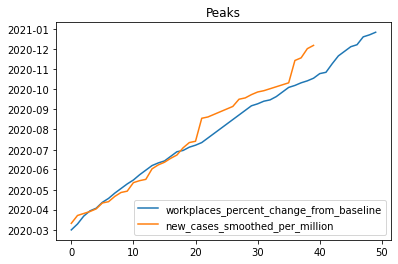

Slope of valleys of workplaces_percent_change_from_baseline is: 6.53
Slope of valleys of new_cases_smoothed_per_million is: 6.03


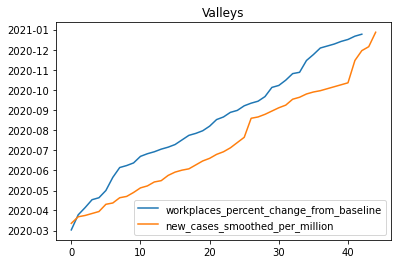

In [10]:
compare_vars(SKG, ATH, var1, var2, 4, 1, 0)

### Conclusion
The plots of Peaks and Valleys illustate the common peaks and valleys between the Decentralized Administration of Macedonia and Thrace and Attica and the Decentralized Administration of Attica. It is clearly observed that the new cases of COVID-19 have a directly proportional relationship with the workplace activity. In more detail, comparing the slopes of the peaks and valeys from workplace with the slope of new cases of Covid, it is concluded that an increse in mobility to the workplace resultes in an increas in Covi cases as well, while lower mobility to the workplace  brought a reduction of cases.